# ChebLieNet: building graphs from sampled Lie groups


In this tutorial, we introduce the notion of group manifold graph, a discretization of a Riemannian manifold. At the moment, four manifolds are available: the translation group $\mathbb{R}^2$, the roto-translation group $SE(2)$, the 3d rotation group $SO(3)$ and the 1-sphere $S(2)$.

We define such a graph as following:
- the vertices corresponds to **uniformly sampled** elements on the manifold,
- the edges connects each vertex to its **K nearest neighbors**, w.r.t an **anisotropic riemannian distance**,
- the edges' weights are computed by a **gaussian weight kernel** applied on the riemannian distance between vertices.

In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Create a graph manifold

In [2]:
from cheblienet.graphs.graphs import SE2GEGraph, SO3GEGraph, S2GEGraph, R2GEGraph, RandomSubGraph

In [3]:
r2_graph = R2GEGraph(
    size=[28, 28, 1],
    K=8,
    sigmas=(1., 1., 1.),
    path_to_graph="saved_graphs",
)

Graph already exists: LOADING...
Done!


In [4]:
eps = 0.1

se2_graph = SE2GEGraph(
    size=[28, 28, 6],
    K=16,
    sigmas=(1., 1/eps**2, 2.048 / (28 ** 2)),
    path_to_graph="saved_graphs"
)

Graph does not already exist: INITIALIZATION...
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4704/4704 [00:26<00:00, 180.09it/s]
Done!
Saved!


In [5]:
s2_graph = S2GEGraph(
    size=[642, 1],
    K=8,
    sigmas=(1., 1., 1.),
    path_to_graph="saved_graphs"
)

Graph already exists: LOADING...
Done!


In [6]:
so3_graph = SO3GEGraph(
    size=[642, 6],
    K=32,
    sigmas=(1., .1, 10/642),
    path_to_graph="saved_graphs"
)

Graph does not already exist: INITIALIZATION...
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3852/3852 [00:35<00:00, 109.69it/s]
Done!
Saved!


## Get informations

In [7]:
s2_graph.is_connected

True

In [8]:
s2_graph.is_undirected

True

In [9]:
s2_graph.manifold

's2'

In [10]:
s2_graph.num_vertices

642

In [11]:
s2_graph.num_edges # number of directed edges

3912

In [12]:
s2_graph.vertex_index[:10]

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
s2_graph.vertex_attributes

('vertex_beta', 'vertex_gamma')

In [14]:
s2_graph.vertex_beta[:10], s2_graph.vertex_gamma[:10]

(tensor([1.5708, 1.5708, 1.5708, 1.5708, 0.5536, 0.5536, 2.5880, 2.5880, 2.1244,
         1.0172], dtype=torch.float64),
 tensor([ 2.1244,  1.0172, -2.1244, -1.0172, -1.5708,  1.5708, -1.5708,  1.5708,
          0.0000,  0.0000], dtype=torch.float64))

In [15]:
s2_graph.edge_index[:10] # dim 0 is source, dim 1 is target

tensor([[  0,   0,   0,  ..., 641, 641, 641],
        [238, 239, 248,  ..., 391, 594, 640]])

In [16]:
s2_graph.edge_weight[:10] # dim 0 is source, dim 1 is target

tensor([0.0653, 0.0653, 0.3591, 0.3591, 0.3591, 0.3591, 0.0653, 0.3591, 0.0653,
        0.3591])

In [17]:
s2_graph.edge_sqdist[:10] # dim 0 is source, dim 1 is target

tensor([0.0510, 0.0510, 0.0192, 0.0192, 0.0192, 0.0192, 0.0510, 0.0192, 0.0510,
        0.0192])

In [18]:
s2_graph.neighborhood(9) # neighbors index, edges' weights and squared riemannian distance

(tensor([265, 267, 338, 373, 424, 426, 481, 483]),
 tensor([0.3591, 0.3591, 0.3591, 0.0653, 0.0653, 0.0653, 0.3591, 0.3591]),
 tensor([0.0192, 0.0192, 0.0192, 0.0510, 0.0510, 0.0510, 0.0192, 0.0192]))

### Static visualization

In [19]:
def plot_graph(graph, size):
    M, L = size

    fig = plt.figure(figsize=(5*L, 5))
    
    X, Y, Z = graph.cartesian_pos()

    for l in range(L):
        ax = fig.add_subplot(1, L, l + 1, projection="3d")
        ax.scatter(X[l*M:(l+1)*M], Y[l*M:(l+1)*M], Z[l*M:(l+1)*M], c="firebrick")
        ax.axis("off")

    fig.tight_layout()

def plot_graph_neighborhood(graph, index, size):
    M, L = size

    fig = plt.figure(figsize=(5, 5))
    
    X, Y, Z = graph.cartesian_pos()

    neighbors_indices, neighbors_weights, _ = graph.neighborhood(index)
    weights = torch.zeros(graph.num_vertices)
    weights[neighbors_indices] = neighbors_weights
    for l in range(L):
        ax = fig.add_subplot(L, 1, l + 1, projection="3d")
        ax.scatter(X[l*M:(l+1)*M], Y[l*M:(l+1)*M], Z[l*M:(l+1)*M], c=weights[l*M:(l+1)*M], cmap=cm.PuRd)
        ax.axis("off")

    fig.tight_layout()

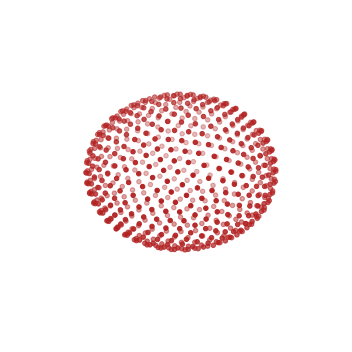

In [20]:
plot_graph(s2_graph, [642, 1])

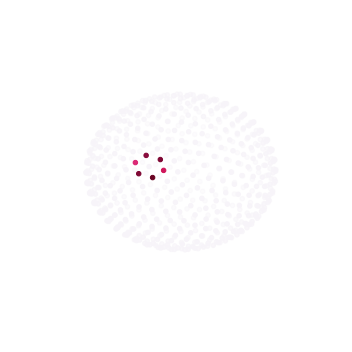

In [21]:
plot_graph_neighborhood(s2_graph, 406, [642, 1])

### Dynamic visualization

In [22]:
from cheblienet.graphs.viz import visualize_graph, visualize_graph_neighborhood, visualize_graph_signal

In [23]:
eps = 0.1
xi = 6 / (28 ** 2)

se2_graph = SE2GEGraph(
    size=[28, 28, 6],
    K=32,
    sigmas=(1., 1/eps, xi),
    path_to_graph="saved_graphs"
)

Graph does not already exist: INITIALIZATION...
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4704/4704 [00:29<00:00, 161.20it/s]
Done!
Saved!


In [24]:
visualize_graph_neighborhood(se2_graph, 156)

In [25]:
so3_graph = SO3GEGraph(
    size=[642, 6],
    K=16,
    sigmas=(1., .1, 10/642),
    path_to_graph="saved_graphs"
)

Graph already exists: LOADING...
Done!


In [26]:
visualize_graph(so3_graph)

In [27]:
signal = torch.rand(s2_graph.num_vertices)
visualize_graph_signal(s2_graph, signal)

## Random sub graph

In [28]:
random_subgraph = RandomSubGraph(s2_graph)
random_subgraph.num_vertices, random_subgraph.num_edges

(642, 3912)

In [29]:
random_subgraph.reinit()
random_subgraph.edges_sampling(0.9)
random_subgraph.num_vertices, random_subgraph.num_edges

Reinit graph...
Done!
Sample edges...
Done!


(642, 3522)

In [30]:
random_subgraph.reinit()
random_subgraph.vertices_sampling(0.5)
random_subgraph.num_vertices, random_subgraph.num_edges

Reinit graph...
Done!
Sample vertices...
Done!


(321, 1030)